# Clone my driving behavior

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Lambda, Dropout
from livelossplot import PlotLossesKeras

In [30]:
user = !whoami
user = user[0]

In [37]:
IMAGE_SHAPE = (160, 320, 3)
PROJECT_DIR = '/home/ubuntu/cloning' if user == 'ubuntu' else '/home/mariosk/Desktop/autonomous_driving/CarND-Behavioral-Cloning-P3'

## Load images and measurements

In [38]:
driving_log = (
    pd.read_csv(
        './my-videos/first_drives/driving_log.csv', 
        header=None,
        names=[
            'center_image', 'left_image', 'right_image', 
            'steering_angle', 'throttle', 'break', 'speed'])
    .assign(center_image=lambda df: PROJECT_DIR + "/my-videos/first_drives/" + df["center_image"].str.split("/").str[7:].str.join("/")))

In [39]:
%%time
raw_images = np.stack(driving_log['center_image'].map(plt.imread), axis=0)
flipped_images = np.flip(raw_images, axis=2)

images = np.vstack([raw_images, flipped_images]) 

CPU times: user 2.42 s, sys: 280 ms, total: 2.7 s
Wall time: 2.7 s


In [40]:
raw_measurements = driving_log['steering_angle']
measurements_flipped = - raw_measurements

measurements = np.hstack([raw_measurements, measurements_flipped])

## Define model

In [65]:
model = Sequential([
    Lambda(lambda x: x / 255.0 - 0.5, input_shape=IMAGE_SHAPE),
    Conv2D(20, (5, 5), activation='relu'),
    Conv2D(20, (5, 5), activation='relu'),
    MaxPooling2D(),
    Conv2D(50, (5, 5), activation='relu'),
    Conv2D(50, (5, 5), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(120),
    Dense(84),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 156, 316, 20)      1520      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 152, 312, 20)      10020     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 76, 156, 20)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 152, 50)       25050     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 68, 148, 50)       62550     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 34, 74, 50)        0         
__________

## Train model

In [67]:
model.fit(
    images, 
    measurements, 
    epochs=1,
    validation_split=0.2, 
    shuffle=True)

Train on 2574 samples, validate on 644 samples
Epoch 1/1
2574/2574 [==============================] - 23s 9ms/step - loss: 10.7533 - val_loss: 0.0197


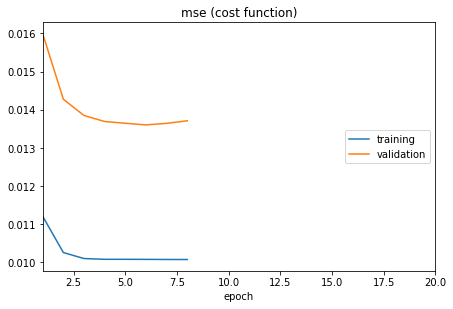

mse (cost function):
training   (min:    0.010, max:    0.011, cur:    0.010)
validation (min:    0.014, max:    0.016, cur:    0.014)
Epoch 9/20
1728/2574 [===================>..........] - ETA: 6s - loss: 0.0106

In [ ]:
model.fit(
    images, 
    measurements, 
    epochs=20,
    callbacks=[PlotLossesKeras()],
    validation_split=0.2, 
    shuffle=True)

In [ ]:
model.save('./models/model_lenet_variant_dropout.h5a')